In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


In [2]:
dataset=pd.read_csv("bank-additional-full.csv",sep=";")
print(dataset.shape)
dataset['y']=dataset['y'].eq('yes').mul(1)
dataset.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Understanding the data

In [3]:
#Check all columns
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#Check if there are missing values and the type of each feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#More info about each feature
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


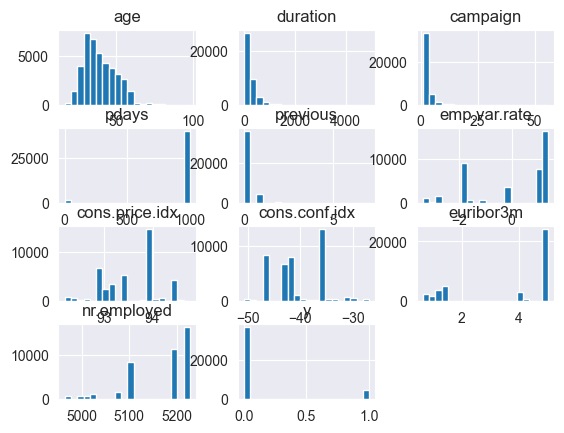

In [6]:
dataset.hist(bins=20)
plt.show()

In [7]:
#Check correlation
dataset.select_dtypes(include=np.number).corr()[['y']]

,y
age,0.030399
duration,0.405274
campaign,-0.066357
pdays,-0.324914
previous,0.230181
emp.var.rate,-0.298334
cons.price.idx,-0.136211
cons.conf.idx,0.054878
euribor3m,-0.307771
nr.employed,-0.354678


In [8]:
#Targe value is imbalaced
dataset.y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [9]:
36548/(36548+4640)

0.8873458288821987

### Data preprocessing
All categorical columns conver to one hot encoder, as shown below they all perform better correlation than label encoder
For numerical would apply Standard Scalar or log, depends on which one yield the best correlation

In [10]:
from sklearn import preprocessing

To identify the optimal tranformation for each column, would compare with the correlation of the target value,
and choose the transformation that provide the beste correlation  

For numerical column, StandardScaler, Log and MinMax is applied  
For categorical Label encoder and one hot encoder  


#### Categorical

In [11]:
columns_cat=['job', 'marital','month', 'day_of_week','education', 'poutcome','default', 'housing', 'loan','contact']
le = preprocessing.LabelEncoder()

In [12]:
dfs_cat=[]
for col in columns_cat:
    lencoder=le.fit_transform(dataset[col])
    lencoder=pd.DataFrame(lencoder,columns=['label_encoder'])
    ohe=pd.get_dummies(dataset[[col]])

    temp=pd.concat([lencoder,ohe,dataset[['y']]  ],axis=1).corr()[['y']]
    temp=temp.rename(columns={'y':col})
    temp=temp.transpose()
    temp=temp.drop('y',axis=1)
    temp_columns=list(temp.columns)
    temp_columns.remove("label_encoder")
    temp['one_hot_encoder_sum']=temp[temp_columns].apply(np.absolute, axis=1).apply(np.sum, axis=1)
    temp['one_hot_encoder_avg']=temp[temp_columns].apply(np.absolute, axis=1).apply(np.average, axis=1)
    temp=temp.drop(temp_columns,axis=1)
    dfs_cat.append(temp)
pd.concat(dfs_cat)

,label_encoder,one_hot_encoder_sum,one_hot_encoder_avg
job,0.025122,0.373608,0.031134
marital,0.046203,0.113350,0.028338
month,-0.006065,0.733179,0.073318
day_of_week,0.015967,0.056498,0.011300
education,0.057799,0.166946,0.020868
poutcome,0.129789,0.541575,0.180525
default,-0.099352,0.201679,0.067226
housing,0.011552,0.025098,0.008366
loan,-0.004909,0.011859,0.003953
contact,-0.144773,0.289546,0.144773


if one_hot_encoder_sum	||  one_hot_encoder_avg is >=  label_encoder	then one_hot_encoder is selected  
Results:  
One Hot encoder: Job, marital, month, day_of_week ,poutcome  
In case of education, a specific order woul be applied  

#### Numerical

In [13]:
scaler= preprocessing.StandardScaler()
minmax=preprocessing.MinMaxScaler()

In [14]:
#to avoid the 0 division in log transformation, replace 0 to 0.001
dataset['pdays_no_0']=dataset['pdays'].replace(0, 0.001)
dataset['previous_no_0']=dataset['previous']+1
#Avoid negative log
dataset['cons.conf.idx_pos']=np.abs(dataset['cons.conf.idx'])
dataset['emp.var.rate_pos']=dataset['emp.var.rate']+np.absolute(dataset['emp.var.rate'].min())+0.01



In [15]:
columns_num=['age','campaign', 'pdays_no_0',  'nr.employed','previous_no_0', 'cons.price.idx', 'euribor3m','emp.var.rate_pos','cons.conf.idx_pos']
# campaign, nr.employed,cons.price.idx, euribor3m


In [16]:
dfs_num=[]
for col in columns_num:
    log=np.log(dataset[[col]])
    log=log.rename(columns={col:f'log'})
    scl=scaler.fit_transform(dataset[[col]])
    scl=pd.DataFrame(scl,columns=[f'scl'])
    m_m=minmax.fit_transform(dataset[[col]])
    m_m=pd.DataFrame(m_m,columns=[f'minmax'])

    #Some shitty magic
    temp=pd.concat([dataset[[col]],scl,log,m_m,dataset[['y']]  ],axis=1).corr()[['y']]
    temp=temp.rename(columns={'y':col})
    temp=temp.transpose()
    temp=temp.rename(columns={col:'original'})
    dfs_num.append(temp)
pd.concat(dfs_num).drop('y',axis=1)

,original,scl,log,minmax
age,0.030399,0.030399,0.002676,0.030399
campaign,-0.066357,-0.066357,-0.069780,-0.066357
pdays_no_0,-0.324914,-0.324914,-0.319393,-0.324914
nr.employed,-0.354678,-0.354678,-0.355729,-0.354678
previous_no_0,0.230181,0.230181,0.222947,0.230181
cons.price.idx,-0.136211,-0.136211,-0.136679,-0.136211
euribor3m,-0.307771,-0.307771,-0.334519,-0.307771
emp.var.rate_pos,-0.298334,-0.298334,-0.280988,-0.298334
cons.conf.idx_pos,-0.054878,-0.054878,-0.070961,-0.054878


Criteria: Select the highest correlation  
StandardScaler: age, pdays,emp.var.rate,previous  
Log: campaign, nr.employed,cons.price.idx, euribor3m,cons.conf.idx_pos


#### Log

In [17]:
# df_log=np.log(dataset[['age', 'campaign','pdays_no_0','nr.employed']])
df_log=np.log(dataset[[ 'nr.employed','campaign', 'euribor3m','cons.price.idx','cons.conf.idx_pos']])
df_log.head()

,nr.employed,campaign,euribor3m,cons.price.idx,cons.conf.idx_pos
0,8.554682,0.0,1.580421,4.543231,3.594569
1,8.554682,0.0,1.580421,4.543231,3.594569
2,8.554682,0.0,1.580421,4.543231,3.594569
3,8.554682,0.0,1.580421,4.543231,3.594569
4,8.554682,0.0,1.580421,4.543231,3.594569


#### StandardScalar

In [18]:
scaler = preprocessing .StandardScaler()
ss_columns=['age','pdays', 'emp.var.rate', 'previous']
ss_columns=columns_num=['age','campaign', 'pdays',  'nr.employed','previous', 'cons.price.idx', 'euribor3m','emp.var.rate','cons.conf.idx']
df_ss=pd.DataFrame(scaler.fit_transform(dataset[ss_columns]),columns=ss_columns)
df_ss.head()

,age,campaign,pdays,nr.employed,previous,cons.price.idx,euribor3m,emp.var.rate,cons.conf.idx
0,1.533034,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447
1,1.628993,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447
2,-0.290186,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447
3,-0.002309,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447
4,1.533034,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447


#### One hot encoder

In [19]:
df_ohe=pd.get_dummies(dataset[['job', 'marital','month', 'day_of_week','poutcome','education','default','loan','housing','contact']])
df_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone
0,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,True


#### Order Attempt
Education can be label, the higher the degree the greater the number
However show worst correlation, so we stick with one hote encoder

##### Education


In [20]:
dict_order_education={'university.degree':8,
'professional.course':7,
'high.school':6,
'basic.9y':5,
'basic.6y':4,
'basic.4y':3,
'unknown':2,
'illiterate':1,}

In [21]:
df_order=pd.DataFrame()

In [22]:
df_order['education_num']=dataset['education'].apply(lambda x:dict_order_education[x] )


In [23]:
df_order['y']=dataset['y']
df_order.corr()[['y']]

,y
education_num,0.035848
y,1.000000


#### Join
By empirical result the best choices are only use StandarScaler and One Hot encoder

In [24]:
# X=pd.concat([df_log,df_ss,df_ohe,df_order,df_binary],axis=1)
# X=pd.concat([df_log,df_ss,df_ohe],axis=1)
# columns_num=['age','campaign', 'pdays',  'nr.employed','previous', 'cons.price.idx', 'euribor3m','emp.var.rate_pos','cons.conf.idx_pos']

X=pd.concat([df_ss,df_ohe],axis=1)
X.head()

,age,campaign,pdays,nr.employed,previous,cons.price.idx,euribor3m,emp.var.rate,cons.conf.idx,job_admin.,...,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone
0,1.533034,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447,False,...,False,False,True,False,False,True,False,False,False,True
1,1.628993,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447,False,...,True,False,True,False,False,True,False,False,False,True
2,-0.290186,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447,False,...,False,False,True,False,False,False,False,True,False,True
3,-0.002309,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447,True,...,False,False,True,False,False,True,False,False,False,True
4,1.533034,-0.565922,0.195414,0.33168,-0.349494,0.722722,0.71246,0.648092,0.886447,False,...,False,False,False,False,True,True,False,False,False,True


In [25]:
X['y']=dataset['y']
X.corr()[['y']]


,y
age,0.030399
campaign,-0.066357
pdays,-0.324914
nr.employed,-0.354678
previous,0.230181
...,...
housing_unknown,-0.002270
housing_yes,0.011743
contact_cellular,0.144773
contact_telephone,-0.144773


In [26]:
X=X.drop('y',axis=1)

### Modelling

In the section we aplying LazyClassifier, and then choose the best model to later fine-tune it
The LazyClassifier from the lazypredict library automates the process of training and evaluating multiple classification models on a dataset to quickly compare their performance.

#### General Function

In [27]:
def preds_score(y_preds,y_test):
    acc=metrics.accuracy_score(y_test, y_preds)
    print("Accuracy:",acc)
    f1= f1_score(y_test, y_preds, average='macro')
    print("F1 Score:",f1)
    roc= roc_auc_score(y_test, y_preds, average='macro')
    print("ROC AUC",roc)
    return acc,f1,roc
def plot_roc_auc(y_test, y_preds, title=""):
    # Calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

def plot_confusion_matrix(y_test, y_preds,title=''):
    # Assuming y_test is your true labels
    conf_mat = confusion_matrix(y_test, y_preds)

    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix-{title}')
    plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
    plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
    plt.show()


In [28]:
y=dataset[['y']]

#### LGBMClassifier  
The goal is to find the best hyperparameter, to achieve it, we will implement GridSearch

In [29]:
from lightgbm import LGBMClassifier

OSError: dlopen(/Users/liqing/Documents/PyCharmProjects/MachineLearningProject/.venv/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: '/opt/homebrew/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Users/liqing/Documents/PyCharmProjects/MachineLearningProject/.venv/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so'
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

##### Simple Approach

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=81)

In [ ]:
%%capture
lgbm =LGBMClassifier()
lgbm.fit(X_train,y_train)

In [ ]:
y_preds=lgbm.predict(X_test)
lgmb_sa=preds_score(y_preds,y_test)


##### Best correlation columns

In [ ]:
best_col_corr=[
'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed', 'job_services','job_student', 'job_technician', 'job_unemployed', 'job_unknown',
'month_apr', 'month_aug', 'month_dec', 'month_jul','month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct','month_sep' ,
'poutcome_nonexistent','poutcome_failure','poutcome_success',
'nr.employed','euribor3m'
,'pdays',
'emp.var.rate',
'contact_cellular','contact_telephone',
'previous'
# ,'cons.price.idx'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[best_col_corr], y, test_size=0.2,random_state=81)

In [ ]:
%%capture
lgbm =LGBMClassifier()
lgbm.fit(X_train,y_train)

In [ ]:
y_preds=lgbm.predict(X_test)
lgmb_bc=preds_score(y_preds,y_test)

##### GridSeacrh

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    # 'objective': 'binary',
    'boosting_type': ['gbdt','dart','rf'],
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 500],
    # 'max_depth': [5, 10, -1],
}


In [ ]:
%%capture
lgbm =LGBMClassifier()
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring= "accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
y_preds=grid_search.predict(X_test)
lgmb_gs=preds_score(y_preds,y_test)

In [ ]:
plot_confusion_matrix(y_test,y_preds,title='LGBM Best Grid Search')

In [ ]:
plot_roc_auc(y_test,y_preds,title='LGBM Classifier Best params Grid Search')

In [ ]:
pd.DataFrame([lgmb_sa,lgmb_bc,lgmb_gs],index=['Simple Aproach','Best correlation Columns', "Grid Search best"],columns=['Accuracy','F1 Score',"Roc Auc"])

#### LogisticRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression

##### Simple Aproach
Use default model with all columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=81)

In [ ]:
# LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train.values.ravel())

In [ ]:
y_preds=lr.predict(X_test)
ls_sa=preds_score(y_preds,y_test)

##### Best correlation columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[best_col_corr], y, test_size=0.2,random_state=81)

In [ ]:
# LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train.values.ravel())

In [ ]:
y_preds=lr.predict(X_test)
ls_bc=preds_score(y_preds,y_test)

##### Grid Search

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example regularization values
    'penalty': ['l1', 'l2','elasticnet'],  # Types of regularization
    'max_iter':[2000],
    # Note: Not all solvers support all penalties, adjust accordingly
    'solver': ['lbfgs','liblinear', 'saga','newton-cholesky']  # Good for small datasets and l1 penalty
}

In [ ]:
log_reg = LogisticRegression()  # Increase max_iter for convergence
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)


In [ ]:
%%capture captured_output
grid_search.fit(X_train, y_train.values.ravel())  # X_train and y_train are your features and target variable


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# For a detailed summary
results = pd.DataFrame(grid_search.cv_results_)
#Default is C=1, penalty = l2, solver ='lbfgs'

In [ ]:
y_preds=grid_search.predict(X_test)
ls_gs=preds_score(y_preds,y_test)

In [ ]:
plot_confusion_matrix(y_preds,y_test,title='Logistic Regressor Best Grid Search')

In [ ]:
plot_roc_auc(y_test,y_preds,title='Logistic Regressor Best Grid Search params')

In [ ]:
pd.DataFrame([ls_sa,ls_bc,ls_gs],index=['Simple Aproach','Best correlation Columns', "Grid Search best"],columns=['Accuracy','F1 Score',"Roc Auc"])

In [ ]:
log_reg = LogisticRegression(max_iter=2000, C=1, penalty='l1',solver='liblinear')
log_reg.fit(X_train,y_train.values.ravel())

In [ ]:
y_preds=grid_search.predict(X_test)
ls_gs=preds_score(y_preds,y_test)